In [1]:
#First we will import all the necessary libraries that can be used in building a model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# added all the libraries in one place so that the code can be easily readable

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
inp0 = pd.read_csv('day.csv') # importing the csv file for data 

First we will start by cleaning the data and checking if there is any null values in it or not

In [4]:
inp0.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
inp0.info() # getting the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
inp0.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
inp0.shape # how many rows and columns are there in this data

(730, 16)

In [8]:
inp0.isnull().sum() # if there is any null values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
inp0.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

As we can see some names of the columns are hard to understand so we will rename some columns so that they can be easily readible

In [10]:
inp0.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'cnt':'count', 'hum':'humidity', 'weathersit':'climate'},inplace=True)

In [11]:
inp0.head(5) # to check if renaming works fine or not

,instant,date,season,year,month,holiday,weekday,workingday,climate,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Will drop the columns that has no values and they doesnot affect the data that much

In [12]:
inp0.drop(['instant','date','casual', 'registered'],inplace=True,axis=1)

In [13]:
inp0.head() #checking again

,season,year,month,holiday,weekday,workingday,climate,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
inp0.shape

(730, 12)

We will now replace the values with the real meaning behind it so one can understand

In [15]:
inp0.season = inp0.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [16]:
inp0.month = inp0.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [17]:
inp0.weekday = inp0.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [18]:
inp0.climate = inp0.climate.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [19]:
inp0.head(5)

,season,year,month,holiday,weekday,workingday,climate,temp,atemp,humidity,windspeed,count
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
unique_values={}
for x in ['season', 'year', 'month','weekday']:
    unique_values[x] = inp0[x].unique()
    print(unique_values) # just to check the unique values no relation to the code

{'season': array(['spring', 'summer', 'fall', 'winter'], dtype=object)}
{'season': array(['spring', 'summer', 'fall', 'winter'], dtype=object), 'year': array([0, 1], dtype=int64)}
{'season': array(['spring', 'summer', 'fall', 'winter'], dtype=object), 'year': array([0, 1], dtype=int64), 'month': array(['jan', 'feb', 'mar', 'apr', 'may', 'june', 'july', 'aug', 'sep',
       'oct', 'nov', 'dec'], dtype=object)}
{'season': array(['spring', 'summer', 'fall', 'winter'], dtype=object), 'year': array([0, 1], dtype=int64), 'month': array(['jan', 'feb', 'mar', 'apr', 'may', 'june', 'july', 'aug', 'sep',
       'oct', 'nov', 'dec'], dtype=object), 'weekday': array(['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'], dtype=object)}


In [21]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   climate     730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# visualization of the Data

In [22]:
#using pairplot checking the collinearity of all the variables

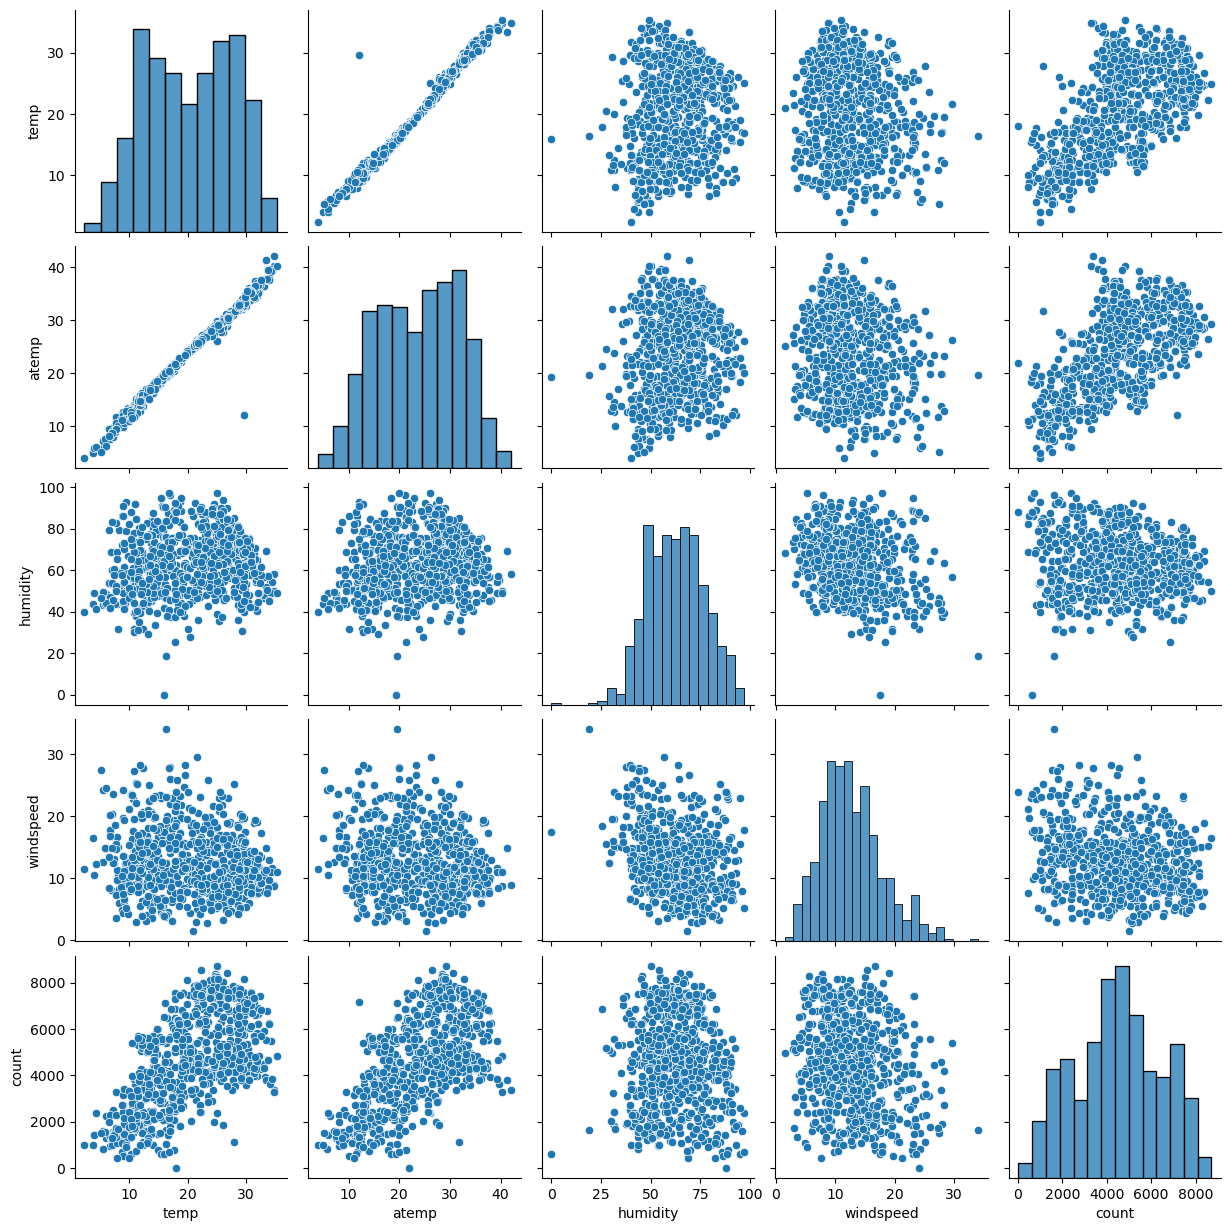

In [23]:
sns.pairplot(data=inp0, vars=['temp','atemp', 'humidity','windspeed','count'])
plt.show()

In [24]:
#Now we are using the boxplot to check the outliers

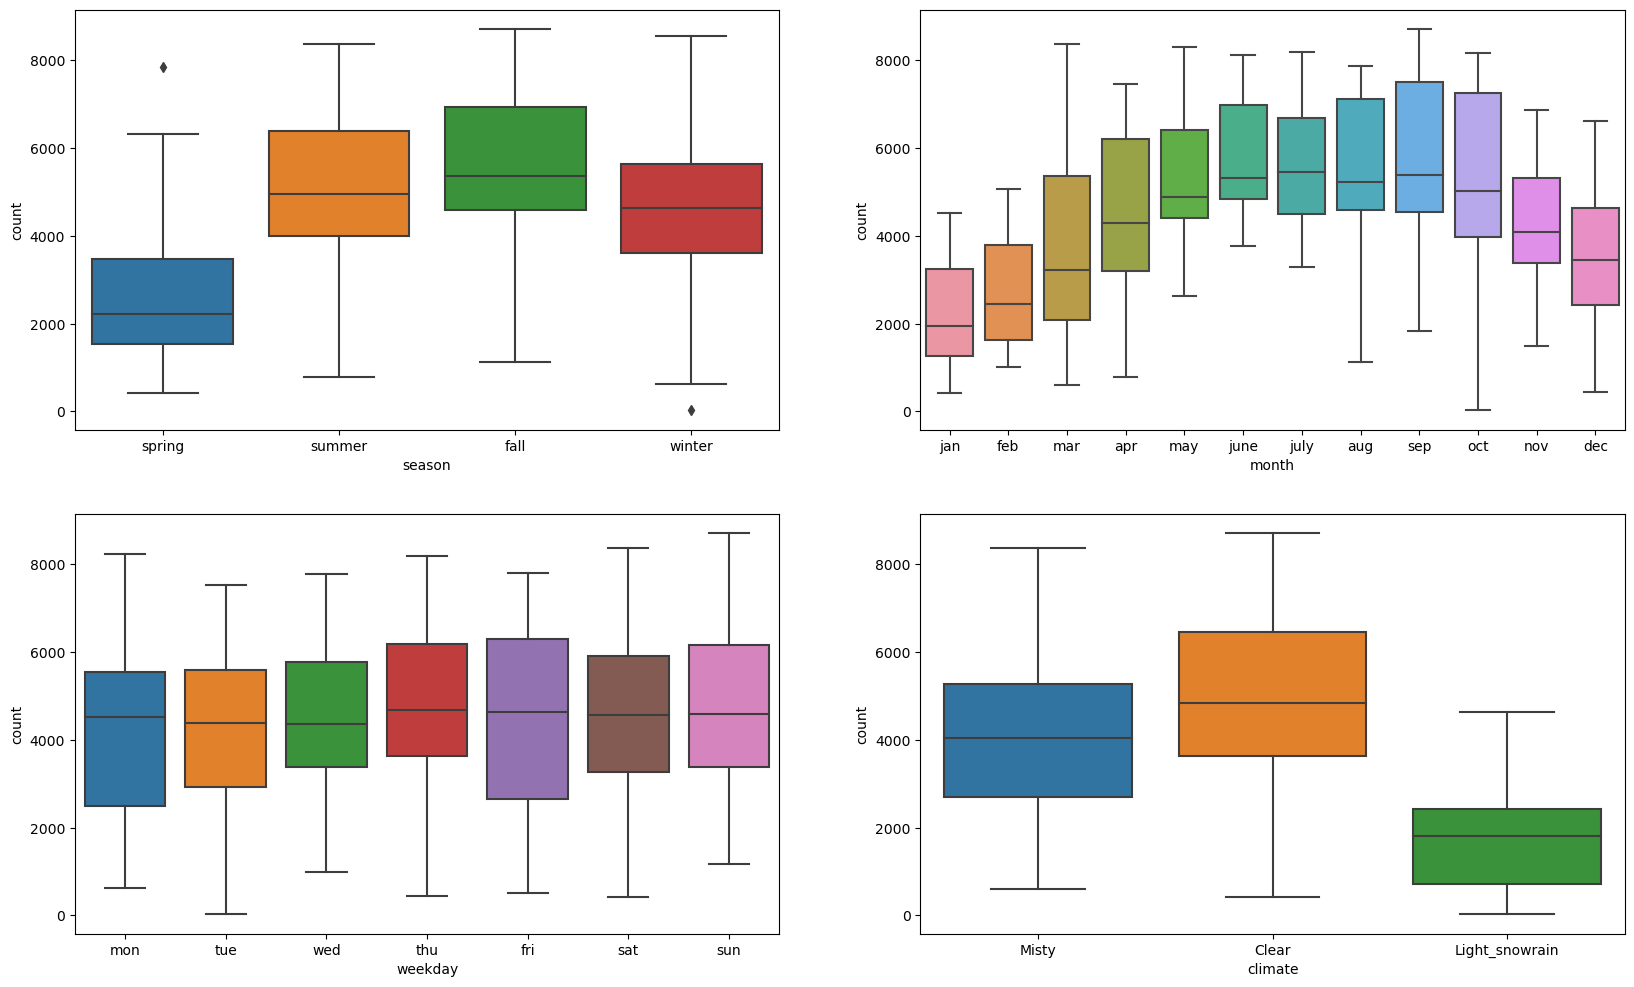

In [25]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'count', data = inp0)
plt.subplot(2,2,2)
sns.boxplot(x = 'month', y = 'count', data = inp0)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'count', data = inp0)
plt.subplot(2,2,4)
sns.boxplot(x = 'climate', y = 'count', data = inp0)
plt.show()

In [26]:
inp0.climate.isnull().sum()

0

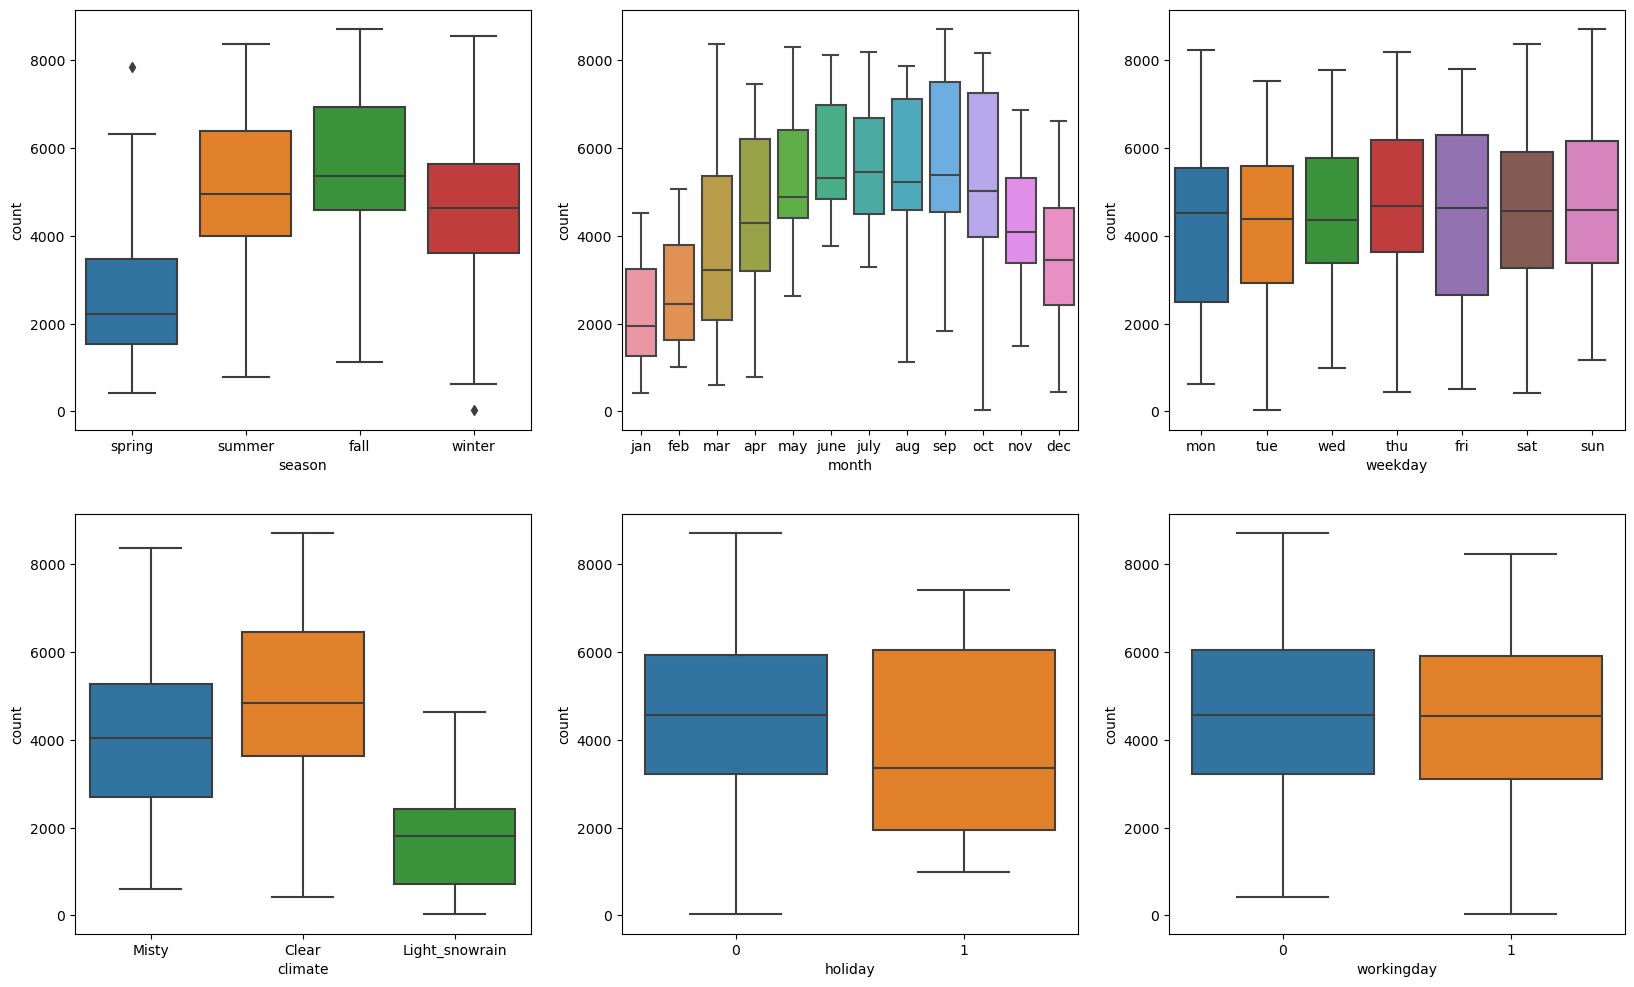

In [27]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = inp0)
plt.subplot(2,3,2)
sns.boxplot(x = 'month', y = 'count', data = inp0)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'count', data = inp0)
plt.subplot(2,3,4)
sns.boxplot(x = 'climate', y = 'count', data = inp0)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'count', data = inp0)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = inp0)
plt.show()

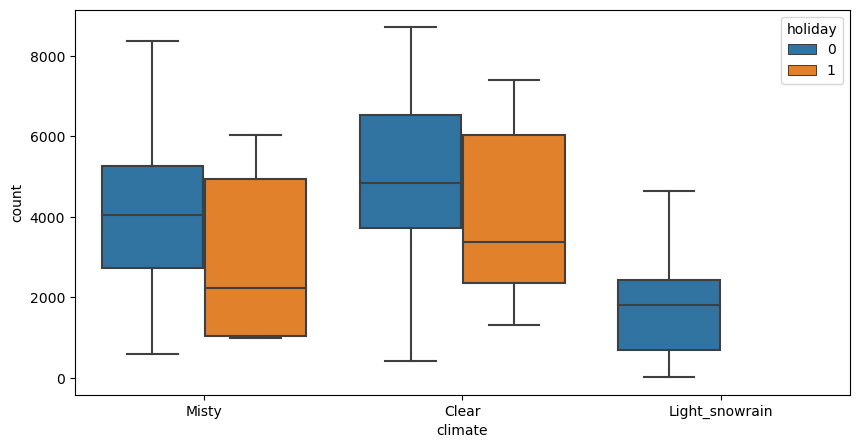

In [28]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'climate', y = 'count', hue = 'holiday', data = inp0)
plt.show()

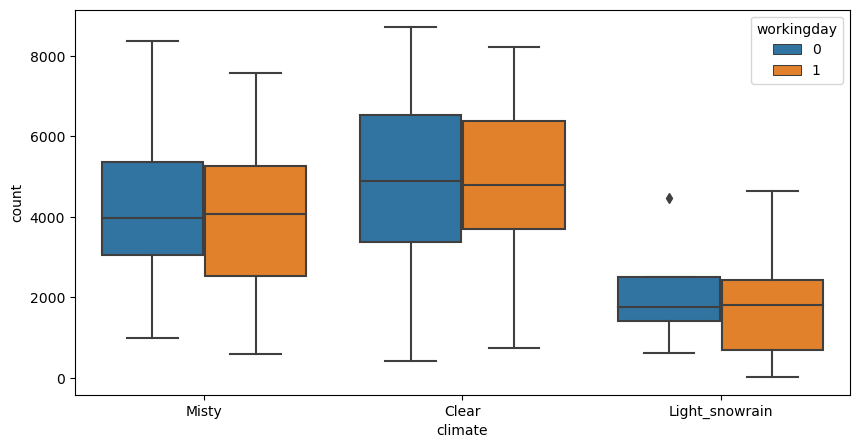

In [29]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'climate', y = 'count', hue = 'workingday', data = inp0)
plt.show()

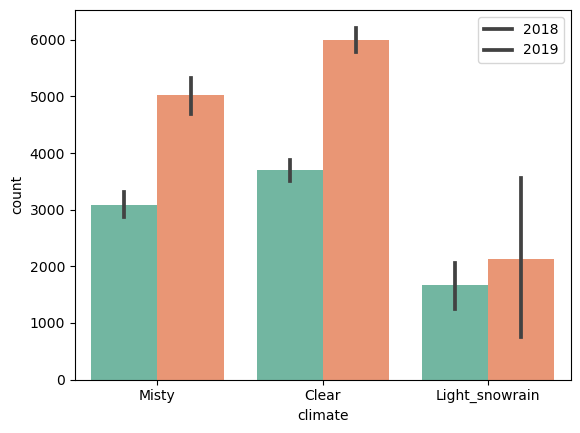

In [30]:
sns.barplot(x='climate',y='count', data=inp0, hue='year',palette='Set2')
plt.legend(labels=['2018', '2019'])
plt.show()

now the visualization is complete

## making the dummy variable

In [31]:
month_dummy = pd.get_dummies(inp0.month, prefix='month', drop_first=True)
weekday_dummy = pd.get_dummies(inp0.weekday, prefix='weekday', drop_first=True)
climate_dummy = pd.get_dummies(inp0.climate, prefix='climate', drop_first=True)
season_dummy = pd.get_dummies(inp0.season, prefix='season', drop_first=True)

In [32]:
inp0.head(5)

,season,year,month,holiday,weekday,workingday,climate,temp,atemp,humidity,windspeed,count
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [33]:
inp0_dummy = pd.concat([inp0, month_dummy, weekday_dummy, climate_dummy, season_dummy], axis=1)

In [34]:
inp0_dummy.head()

,season,year,month,holiday,weekday,workingday,climate,temp,atemp,humidity,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,climate_Light_snowrain,climate_Misty,season_spring,season_summer,season_winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [35]:
inp0_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season                  730 non-null    object 
 1   year                    730 non-null    int64  
 2   month                   730 non-null    object 
 3   holiday                 730 non-null    int64  
 4   weekday                 730 non-null    object 
 5   workingday              730 non-null    int64  
 6   climate                 730 non-null    object 
 7   temp                    730 non-null    float64
 8   atemp                   730 non-null    float64
 9   humidity                730 non-null    float64
 10  windspeed               730 non-null    float64
 11  count                   730 non-null    int64  
 12  month_aug               730 non-null    uint8  
 13  month_dec               730 non-null    uint8  
 14  month_feb               730 non-null    ui

In [36]:
inp0_dummy.shape

(730, 34)

In [37]:
inp0_dummy.drop(['month','weekday','climate','season'], axis = 1, inplace = True) #dropping these because they are no longer neede

In [38]:
inp0_dummy.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,climate_Light_snowrain,climate_Misty,season_spring,season_summer,season_winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
inp0_dummy.shape

(730, 30)

# model building

In [40]:
#Splitting the Data into Training and Testing Sets

In [41]:
np.random.seed(0)
inp0_train, inp0_test = train_test_split(inp0_dummy, train_size = 0.7, random_state = 100)

In [42]:
inp0_train.shape

(510, 30)

In [43]:
inp0_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    510 non-null    int64  
 1   holiday                 510 non-null    int64  
 2   workingday              510 non-null    int64  
 3   temp                    510 non-null    float64
 4   atemp                   510 non-null    float64
 5   humidity                510 non-null    float64
 6   windspeed               510 non-null    float64
 7   count                   510 non-null    int64  
 8   month_aug               510 non-null    uint8  
 9   month_dec               510 non-null    uint8  
 10  month_feb               510 non-null    uint8  
 11  month_jan               510 non-null    uint8  
 12  month_july              510 non-null    uint8  
 13  month_june              510 non-null    uint8  
 14  month_mar               510 non-null    

In [44]:
inp0_test.shape

(220, 30)

In [45]:
inp0_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    220 non-null    int64  
 1   holiday                 220 non-null    int64  
 2   workingday              220 non-null    int64  
 3   temp                    220 non-null    float64
 4   atemp                   220 non-null    float64
 5   humidity                220 non-null    float64
 6   windspeed               220 non-null    float64
 7   count                   220 non-null    int64  
 8   month_aug               220 non-null    uint8  
 9   month_dec               220 non-null    uint8  
 10  month_feb               220 non-null    uint8  
 11  month_jan               220 non-null    uint8  
 12  month_july              220 non-null    uint8  
 13  month_june              220 non-null    uint8  
 14  month_mar               220 non-null    

In [46]:
inp0_train.head(5)

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,climate_Light_snowrain,climate_Misty,season_spring,season_summer,season_winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,1,0,0,0,0,1,0,1,0


In [47]:
#Rescaling the Features

In [48]:
scaler = MinMaxScaler()

In [49]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']

inp0_train[num_vars] = scaler.fit_transform(inp0_train[num_vars]) #applying the scaling to all the columns except the 'dummy' variables

In [50]:
inp0_train.head(5)

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,climate_Light_snowrain,climate_Misty,season_spring,season_summer,season_winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,0,1,0,1,0


In [51]:
inp0_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,climate_Light_snowrain,climate_Misty,season_spring,season_summer,season_winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
#will check the collinearty of all the variables to see which are highly correlated

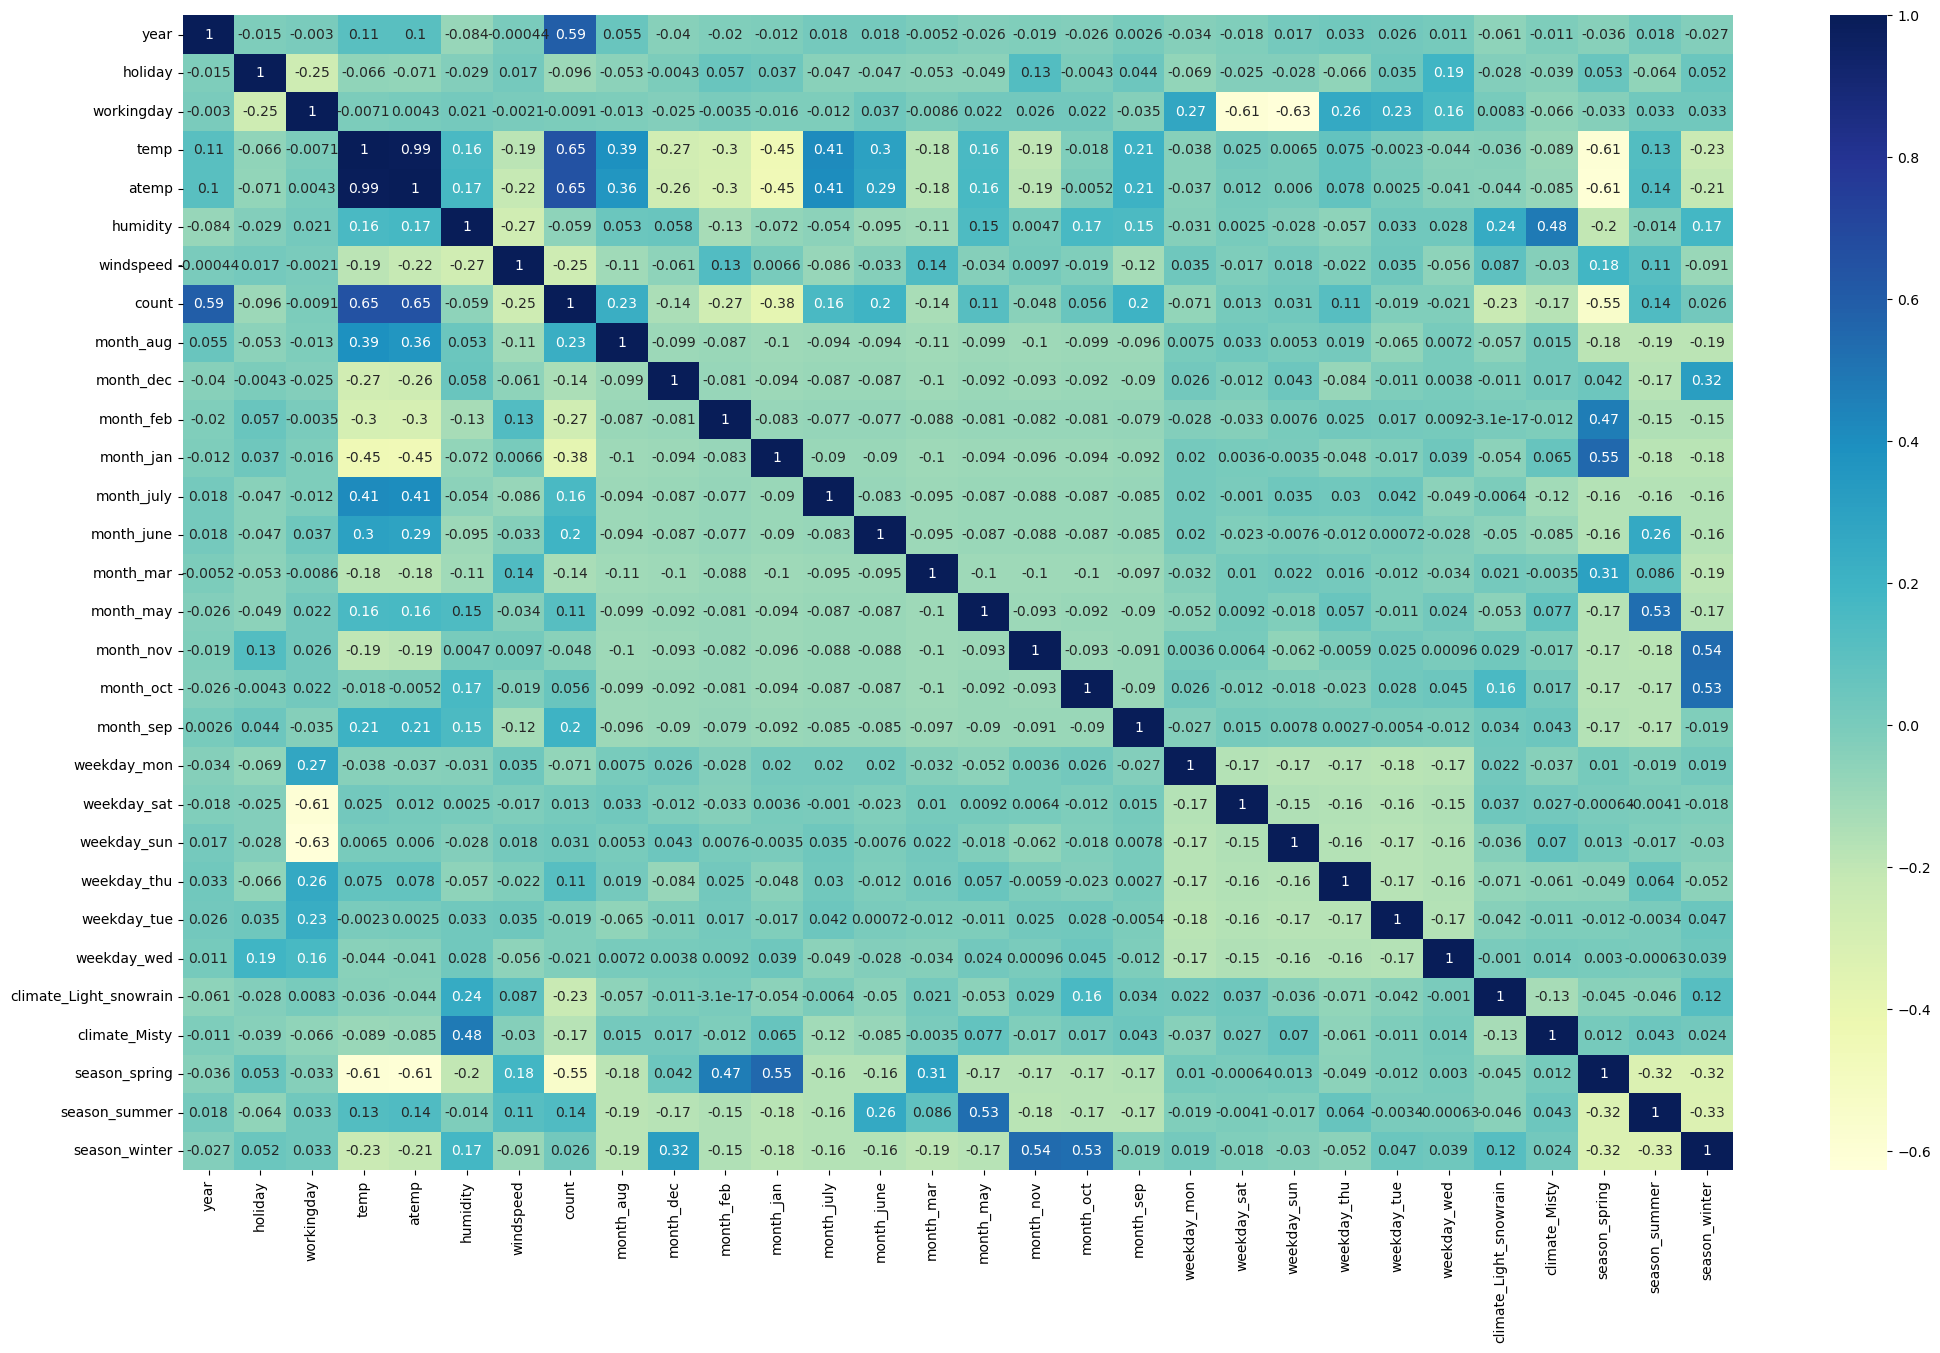

In [53]:
plt.figure(figsize = (25, 15))
sns.heatmap(inp0_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [54]:
inp0_train.temp.shape

(510,)

In [55]:
inp0_train.count

<bound method DataFrame.count of      year  holiday  workingday      temp     atemp  humidity  windspeed  \
576     1        0           1  0.815169  0.766351  0.725633   0.264686   
426     1        0           0  0.442393  0.438975  0.640189   0.255342   
728     1        0           1  0.245101  0.200348  0.498067   0.663106   
482     1        0           0  0.395666  0.391735  0.504508   0.188475   
111     0        0           0  0.345824  0.318819  0.751824   0.380981   
..    ...      ...         ...       ...       ...       ...        ...   
578     1        0           1  0.863973  0.824359  0.679690   0.187140   
53      0        0           1  0.202618  0.218747  0.435939   0.111379   
350     0        0           1  0.248216  0.223544  0.577930   0.431816   
79      0        0           1  0.462664  0.434043  0.759870   0.529881   
520     1        0           1  0.600225  0.586515  0.632030   0.359599   

        count  month_aug  month_dec  ...  weekday_sat  weekday_sun

In [56]:
inp0_train.rename(columns={'count':'cnt'},inplace=True) #getting some problem using the word count so replaced it with cnt again

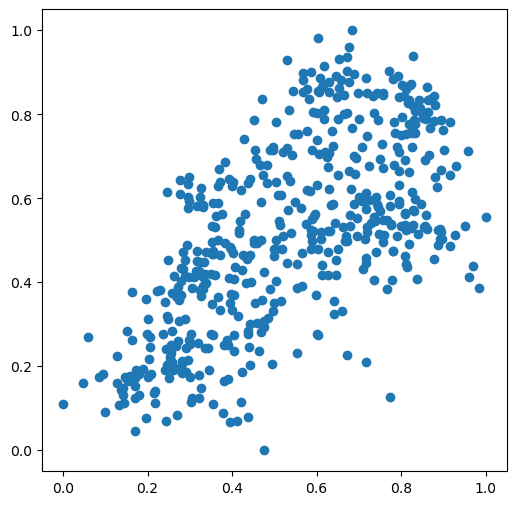

In [57]:
plt.figure(figsize=[6,6])
plt.scatter(inp0_train.temp,inp0_train.cnt)
plt.show()

# Dividing the data into X and Y for model building

In [58]:
y_train = inp0_train.pop('cnt')
X_train = inp0_train


In [59]:
#building a linear model

In [60]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [61]:
rfe = RFE(lm, n_features_to_select=15)

In [62]:
rfe = rfe.fit(X_train, y_train)

In [63]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) #checking all the list of columns

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('month_aug', False, 10),
 ('month_dec', True, 1),
 ('month_feb', False, 2),
 ('month_jan', True, 1),
 ('month_july', True, 1),
 ('month_june', False, 12),
 ('month_mar', False, 15),
 ('month_may', False, 9),
 ('month_nov', True, 1),
 ('month_oct', False, 13),
 ('month_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 11),
 ('climate_Light_snowrain', True, 1),
 ('climate_Misty', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1)]

In [64]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'month_dec',
       'month_jan', 'month_july', 'month_nov', 'month_sep',
       'climate_Light_snowrain', 'climate_Misty', 'season_spring',
       'season_summer', 'season_winter'],
      dtype='object')


In [65]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'month_aug', 'month_feb', 'month_june',
       'month_mar', 'month_may', 'month_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [66]:
#first let create a function as it will be run again and again

In [67]:
def VIF_calculator(inp0):
    vif = pd.DataFrame()
    vif['Features'] = inp0.columns
    vif['VIF'] = [variance_inflation_factor(inp0.values, i) for i in range(inp0.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [ ]:
#we will now chwck the VIF values and then will start eliminating them which are greater than 5

In [68]:
VIF_calculator(X_train_rfe)


,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
12,season_spring,4.37
14,season_winter,4.06
13,season_summer,2.82
11,climate_Misty,2.32
0,year,2.09
8,month_nov,1.85
6,month_jan,1.75


model 1

In [69]:
X_train_lm1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm1).fit()

In [70]:
lr_1.params

const                     0.319667
year                      0.230404
holiday                  -0.091089
temp                      0.481503
humidity                 -0.162213
windspeed                -0.188726
month_dec                -0.035461
month_jan                -0.043411
month_july               -0.055250
month_nov                -0.038701
month_sep                 0.075467
climate_Light_snowrain   -0.246481
climate_Misty            -0.054300
season_spring            -0.061255
season_summer             0.042337
season_winter             0.101921
dtype: float64

In [71]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 02 May 2023   Prob (F-statistic):          8.15e-189
Time:                        21:38:35   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [72]:
X_train_rfe_new = X_train_rfe.drop(['humidity'], axis = 1,)

In [73]:
VIF_calculator(X_train_rfe_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,season_winter,2.95
11,season_spring,2.89
12,season_summer,2.24
0,year,2.07
7,month_nov,1.81
5,month_jan,1.66
6,month_july,1.59
10,climate_Misty,1.57


model 2

In [74]:
X_train_lm2 = sm.add_constant(X_train_rfe_new)
lr_2 = sm.OLS(y_train,X_train_lm2).fit()

In [75]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 02 May 2023   Prob (F-statistic):          4.75e-186
Time:                        21:38:35   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [76]:
X_train_rfe_new = X_train_rfe_new.drop(['month_nov'], axis = 1)

In [77]:
VIF_calculator(X_train_rfe_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,season_spring,2.89
11,season_summer,2.24
0,year,2.07
12,season_winter,2.05
5,month_jan,1.65
6,month_july,1.59
9,climate_Misty,1.57
7,month_sep,1.34


model 3

In [78]:
X_train_lm3 = sm.add_constant(X_train_rfe_new)
lr_3 = sm.OLS(y_train,X_train_lm3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.74e-186
Time:                        21:38:35   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [79]:
X_train_rfe_new = X_train_rfe_new.drop(['month_dec'], axis = 1)

In [80]:
VIF_calculator(X_train_rfe_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,season_spring,2.75
10,season_summer,2.24
0,year,2.07
11,season_winter,1.78
4,month_jan,1.61
5,month_july,1.59
8,climate_Misty,1.56
6,month_sep,1.34


model 4

In [81]:
X_train_lm4 = sm.add_constant(X_train_rfe_new)
lr_4 = sm.OLS(y_train,X_train_lm4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 02 May 2023   Prob (F-statistic):          8.14e-187
Time:                        21:38:36   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [82]:
X_train_rfe_new = X_train_rfe_new.drop(['month_jan'], axis = 1)

In [83]:
VIF_calculator(X_train_rfe_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,season_summer,2.23
8,season_spring,2.08
0,year,2.07
10,season_winter,1.78
4,month_july,1.58
7,climate_Misty,1.55
5,month_sep,1.34
6,climate_Light_snowrain,1.08


model 5

In [84]:
X_train_lm5 = sm.add_constant(X_train_rfe_new)
lr_5 = sm.OLS(y_train,X_train_lm5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 02 May 2023   Prob (F-statistic):          5.06e-187
Time:                        21:38:36   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [85]:
X_train_rfe_new = X_train_rfe_new.drop(['month_july'], axis = 1)

In [86]:
VIF_calculator(X_train_rfe_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,season_spring,1.99
8,season_summer,1.90
9,season_winter,1.63
6,climate_Misty,1.55
4,month_sep,1.23
5,climate_Light_snowrain,1.08
1,holiday,1.04


model 6

In [87]:
X_train_lm6 = sm.add_constant(X_train_rfe_new)
lr_6 = sm.OLS(y_train,X_train_lm6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.47e-186
Time:                        21:38:36   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

## Residual Analysis of the train data

In [88]:
y_train_res = lr_6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

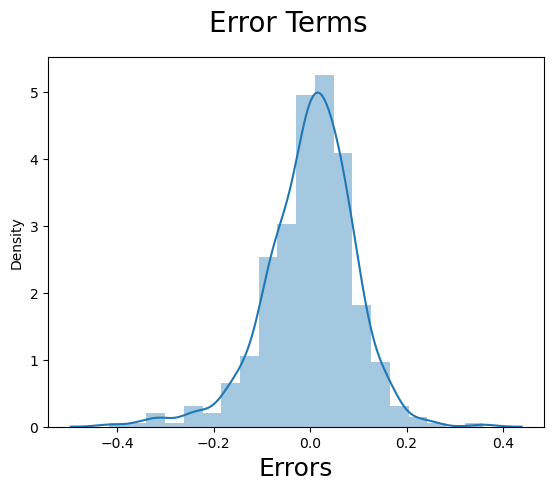

In [89]:
fig = plt.figure()
sns.distplot((y_train - y_train_res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [90]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']
inp0_test[num_vars] = scaler.transform(inp0_test[num_vars])

In [91]:
inp0_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,climate_Light_snowrain,climate_Misty,season_spring,season_summer,season_winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Dividing into X_test and y_test

In [92]:
y_test = inp0_test.pop('count')
X_test = inp0_test

In [93]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    220 non-null    int64  
 1   holiday                 220 non-null    int64  
 2   workingday              220 non-null    int64  
 3   temp                    220 non-null    float64
 4   atemp                   220 non-null    float64
 5   humidity                220 non-null    float64
 6   windspeed               220 non-null    float64
 7   month_aug               220 non-null    uint8  
 8   month_dec               220 non-null    uint8  
 9   month_feb               220 non-null    uint8  
 10  month_jan               220 non-null    uint8  
 11  month_july              220 non-null    uint8  
 12  month_june              220 non-null    uint8  
 13  month_mar               220 non-null    uint8  
 14  month_may               220 non-null    

In [94]:
col_1 = X_train_rfe_new.columns

In [95]:
X_test=X_test[col_1]

In [96]:
X_test_lm_6 = sm.add_constant(X_test)
X_test_lm_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   const                   220 non-null    float64
 1   year                    220 non-null    int64  
 2   holiday                 220 non-null    int64  
 3   temp                    220 non-null    float64
 4   windspeed               220 non-null    float64
 5   month_sep               220 non-null    uint8  
 6   climate_Light_snowrain  220 non-null    uint8  
 7   climate_Misty           220 non-null    uint8  
 8   season_spring           220 non-null    uint8  
 9   season_summer           220 non-null    uint8  
 10  season_winter           220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [ ]:
y_pred = lr_6.predict(X_test_lm_6)

## model evaluation

Text(0, 0.5, 'y_pred')

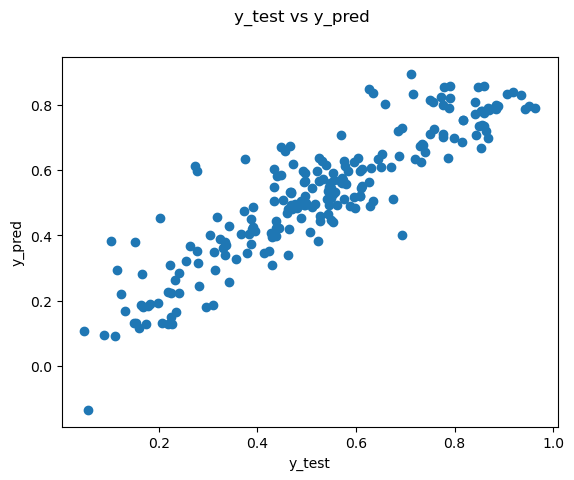

In [98]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred')               
plt.xlabel('y_test')                          
plt.ylabel('y_pred')   

In [ ]:
#finding the r2

In [99]:
r2 = r2_score(y_test, y_pred)

In [100]:
s = X_test.shape[0]
t = X_test.shape[1]
adjusted_r2 = round(1-(1-r2)*(s-1)/(s-t-1),4)
print(adjusted_r2)

0.7944


# Thanks